In [37]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [38]:
# Load cycle_df dataset
cycle_df = pd.read_csv("../data/cycle_df.csv")
cycle_df.head(5).append(cycle_df.tail(5))

,TotalTime,Phase,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,236,artemis_motor130_Motorway 1,60,30.333333,0.694444,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,-2.41667,1.86111,-2.41667,1.86111,0.0
1,237,artemis_motor130_Motorway 1,61,31.027778,0.416667,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,-2.41667,1.86111,-2.41667,1.86111,0.0
2,238,artemis_motor130_Motorway 1,62,31.444444,0.666667,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,-2.41667,1.86111,-2.41667,1.86111,0.0
3,239,artemis_motor130_Motorway 1,63,32.111111,0.555556,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,-2.41667,1.86111,-2.41667,1.86111,0.0
4,240,artemis_motor130_Motorway 1,64,32.666667,0.694444,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,-2.41667,1.86111,-2.41667,1.86111,0.0
8075,8881,wltp_class3b_Extra-high 3,319,0.000000,0.000000,12.94729,0.00000,12.94729,0.00000,12.94729,0.00000,12.94729,0.00000,-1.50000,1.66667,-1.50000,1.66667,2.0
8076,8882,wltp_class3b_Extra-high 3,320,0.000000,0.000000,12.94009,0.00000,12.94009,0.00000,12.94009,0.00000,12.94009,0.00000,-1.50000,1.66667,-1.50000,1.66667,3.0
8077,8883,wltp_class3b_Extra-high 3,321,0.000000,0.000000,12.93289,0.00000,12.93289,0.00000,12.93289,0.00000,12.93289,0.00000,-1.50000,1.66667,-1.50000,1.66667,4.0
8078,8884,wltp_class3b_Extra-high 3,322,0.000000,0.000000,12.92571,0.00000,12.92571,0.00000,12.92571,0.00000,12.92571,0.00000,-1.50000,1.66667,-1.50000,1.66667,5.0
8079,8885,wltp_class3b_Extra-high 3,323,0.000000,0.000000,12.91853,0.00000,12.91853,0.00000,12.91853,0.00000,12.91853,0.00000,-1.50000,1.66667,-1.50000,1.66667,6.0


In [39]:
cycle_df.Phase.unique()

array(['artemis_motor130_Motorway 1', 'artemis_motor130_Motorway 2',
       'artemis_motor130_Motorway 3', 'artemis_motor130_Motorway 4',
       'artemis_road_Road 1', 'artemis_road_Road 2',
       'artemis_road_Road 3', 'artemis_road_Road 4',
       'artemis_road_Road 5', 'artemis_urban_Engine Start',
       'artemis_urban_Urban 1', 'artemis_urban_Urban 2',
       'artemis_urban_Urban 3', 'artemis_urban_Urban 4',
       'artemis_urban_Urban 5', 'ftp72_Phase 1', 'ftp72_Phase 2',
       'ftp_us06_Phase 1', 'hwfet_Phase 1', 'nycc_Phase 1',
       'rts95_Phase 1', 'wltp_class3b_Low 3', 'wltp_class3b_Medium 3-2',
       'wltp_class3b_High 3-2', 'wltp_class3b_Extra-high 3'], dtype=object)

In [40]:
phase_mapping = {
    "artemis_motor130_Motorway 1" : "10",
    "artemis_motor130_Motorway 2" : "20",
    "artemis_motor130_Motorway 3" : "30",
    "artemis_motor130_Motorway 4" : "40",
    "artemis_road_Road 1" : "60",
    "artemis_road_Road 2" : "70",
    "artemis_road_Road 3" : "80",
    "artemis_road_Road 4" : "90",
    "artemis_road_Road 5" : "100",
    "artemis_urban_Engine Start" : "120",
    "artemis_urban_Urban 1" : "130",
    "artemis_urban_Urban 2" : "140",
    "artemis_urban_Urban 3" : "150",
    "artemis_urban_Urban 4" : "160",
    "artemis_urban_Urban 5" : "170",
    "ftp72_Phase 1" : "190",
    "ftp72_Phase 2" : "200",
    "ftp_us06_Phase 1" : "220",
    "hwfet_Phase 1" : "240",
    "nycc_Phase 1" : "260",
    "rts95_Phase 1" : "280",
    "wltp_class3b_Medium 3-2" : "300",
    "wltp_class3b_Low 3" : "310",
    "wltp_class3b_High 3-2" : "320",
    "wltp_class3b_Extra-high 3" : "330"
}

In [41]:
invertion_phase_mapping = {
    "10" : "artemis_motor130_Motorway 1",
    "20" : "artemis_motor130_Motorway 2",
    "30" : "artemis_motor130_Motorway 3",
    "40" : "artemis_motor130_Motorway 4",
    "60" : "artemis_road_Road 1",
    "70" : "artemis_road_Road 2",
    "80" : "artemis_road_Road 3",
    "90" : "artemis_road_Road 4",
    "100" : "artemis_road_Road 5",
    "120" : "artemis_urban_Engine Start",
    "130" : "artemis_urban_Urban 1",
    "140" : "artemis_urban_Urban 2",
    "150" : "artemis_urban_Urban 3",
    "160" : "artemis_urban_Urban 4",
    "170" : "artemis_urban_Urban 5",
    "190" : "ftp72_Phase 1",
    "200" : "ftp72_Phase 2",
    "220" : "ftp_us06_Phase 1",
    "240" : "hwfet_Phase 1",
    "260" : "nycc_Phase 1",
    "280" : "rts95_Phase 1",
    "300" : "wltp_class3b_Medium 3-2",
    "310" : "wltp_class3b_Low 3",
    "320" : "wltp_class3b_High 3-2",
    "330" : "wltp_class3b_Extra-high 3"
}

In [42]:
def convert_phase(df, column_name, phase_dict):
    df[column_name] = df[column_name].replace(phase_dict)
    return df

In [43]:
cycle_df = convert_phase(cycle_df, "Phase", phase_mapping)

In [44]:
cycle_df.head()

,TotalTime,Phase,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,236,10,60,30.333333,0.694444,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,-2.41667,1.86111,-2.41667,1.86111,0.0
1,237,10,61,31.027778,0.416667,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,-2.41667,1.86111,-2.41667,1.86111,0.0
2,238,10,62,31.444444,0.666667,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,-2.41667,1.86111,-2.41667,1.86111,0.0
3,239,10,63,32.111111,0.555556,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,-2.41667,1.86111,-2.41667,1.86111,0.0
4,240,10,64,32.666667,0.694444,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,-2.41667,1.86111,-2.41667,1.86111,0.0


In [45]:
#cycle_df['Phase'] = cycle_df.Phase.replace(phase_mapping)
#cycle_df.head()

In [46]:
#4382
cycle_df.iloc[4382]

TotalTime                     5013
Phase                          240
PhaseTime                      177
Vel                        20.2509
Acc                      -0.134112
5_sec_Vel_mean              18.406
5_sec_Acc_mean             0.11302
10_sec_Vel_mean             18.406
10_sec_Acc_mean            0.11302
30_sec_Vel_mean             18.406
30_sec_Acc_mean            0.11302
60_sec_Vel_mean             18.406
60_sec_Acc_mean            0.11302
30_sec_Acc_min            -1.20701
30_sec_Acc_max             1.43053
60_sec_Acc_min            -1.20701
60_sec_Acc_max             1.43053
60_sec_Vel_iddle_count           0
Name: 4382, dtype: object

In [47]:
cycle_df2 = cycle_df.copy()

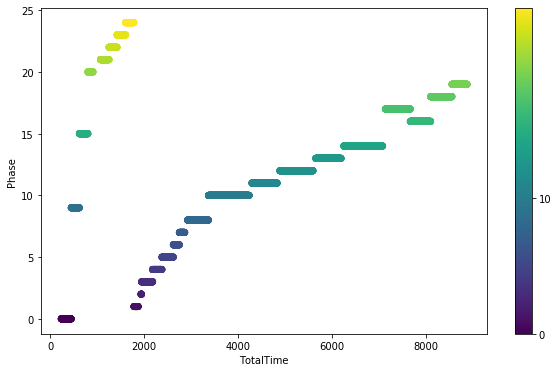

In [48]:
le = preprocessing.LabelEncoder()
le.fit(cycle_df2.Phase.drop_duplicates())
cycle_df2.Phase = le.transform(cycle_df2.Phase)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(10, 6))
plt.scatter(cycle_df2.iloc[:, x], cycle_df2.iloc[:, y],c=cycle_df2.Phase)
plt.colorbar(ticks=[0, 10])
plt.xlabel(cycle_df2.columns[x]);
plt.ylabel(cycle_df2.columns[y]);


In [49]:
!pip install sns

In [50]:
import seaborn as sns

count     8080
unique      25
top        200
freq       867
Name: Phase, dtype: object


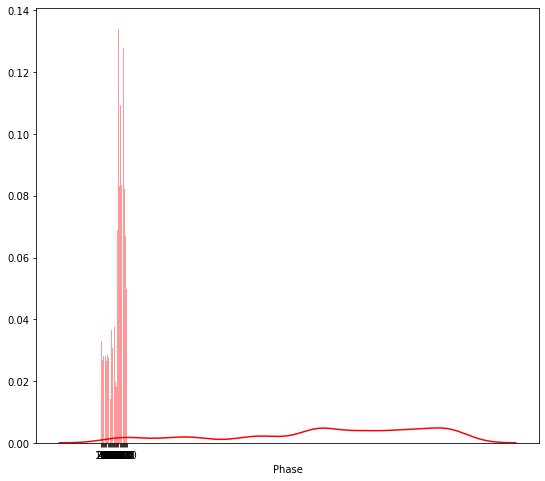

In [51]:
print(cycle_df['Phase'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(cycle_df['Phase'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [52]:
train_df = cycle_df.copy()

In [53]:
train_df = train_df.drop({'Phase', 'TotalTime'}, axis=1)
train_df.head(2)

,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,60,30.333333,0.694444,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,-2.41667,1.86111,-2.41667,1.86111,0.0
1,61,31.027778,0.416667,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,-2.41667,1.86111,-2.41667,1.86111,0.0


In [54]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [55]:
y = cycle_df.Phase

In [56]:
train_df.shape

(8080, 16)

In [57]:
X = train_df.iloc[:,1:16]

In [58]:
X.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,30.333333,0.694444,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,18.68879,0.13147,-2.41667,1.86111,-2.41667,1.86111,0.0
1,31.027778,0.416667,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,18.74086,0.13268,-2.41667,1.86111,-2.41667,1.86111,0.0
2,31.444444,0.666667,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,18.79423,0.13492,-2.41667,1.86111,-2.41667,1.86111,0.0
3,32.111111,0.555556,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,18.84995,0.13668,-2.41667,1.86111,-2.41667,1.86111,0.0
4,32.666667,0.694444,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,18.90752,0.13900,-2.41667,1.86111,-2.41667,1.86111,0.0


In [59]:
X = train_df.iloc[:,1:16]
y = cycle_df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [60]:
X_train.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
4579,25.481280,0.000000,19.73568,0.06795,19.73568,0.06795,19.73568,0.06795,19.73568,0.06795,-1.20701,1.43053,-1.20701,1.43053,0.0
5077,10.997184,-0.134112,2.82928,0.06544,2.82928,0.06544,2.82928,0.06544,2.82928,0.06544,-2.05638,2.50342,-2.05638,2.50342,3.0
862,17.833333,0.277778,12.27545,0.05234,12.27545,0.05234,12.27545,0.05234,12.27545,0.05234,-4.08333,2.36111,-4.08333,2.36111,0.0
5944,9.708333,-1.025000,7.92325,0.01761,7.92325,0.01761,7.92325,0.01761,7.92325,0.01761,-2.71111,2.87778,-2.71111,2.87778,0.0
4188,12.740640,-0.134112,23.53593,0.02420,23.53593,0.02420,23.53593,0.02420,23.53593,0.02420,-3.08458,3.75514,-3.08458,3.75514,8.0


In [61]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [62]:

gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [63]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-11-12 22:11:47.283416
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   21.0s


2020-11-12 22:12:23.228261
0:00:35.944845


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   35.7s finished


In [64]:
print(gsm.best_score_)

0.9719479856492577


In [65]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'weights': 'distance'}

In [66]:
print(gsm.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')


In [67]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
['280' '240' '310' '200' '280' '130' '280' '190' '280' '240' '310' '240'
 '300' '330' '280' '200' '190' '280' '190' '220' '60' '300' '200' '30'
 '260' '70' '70' '170' '330' '220' '240' '40' '240' '200' '190' '130'
 '310' '310' '220' '310' '20' '150' '300' '310' '280' '260' '60' '170'
 '20' '300' '100' '200' '200' '260' '260' '280' '130' '320' '190' '240'
 '300' '140' '70' '240' '200' '330' '90' '310' '260' '200' '240' '300'
 '300' '280' '260' '90' '330' '140' '240' '310' '220' '280' '240' '330'
 '220' '260' '150' '190' '140' '200' '320' '240' '310' '280' '70' '260'
 '70' '280' '240' '310' '220' '160' '40' '20' '280' '200' '70' '280' '260'
 '60' '240' '310' '310' '280' '330' '280' '240' '30' '320' '300' '190'
 '200' '310' '170' '260' '300' '310' '320' '200' '90' '200' '190' '220'
 '200' '280' '70' '40' '130' '310' '320' '220' '150' '220' '130' '60'
 '200' '30' '200' '220' '320' '200' '300' '310' '80' '240' '200' '220'
 '280' '300' '190' '300' '280' '320' '260' '300' '320'

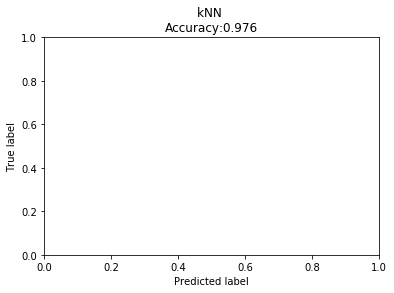

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.88      1.00      0.93        14
         170       1.00      0.88      0.94        17
         190       0.98      0.98      0.98        45
          20       1.00      0.86      0.92        14
         200       0.99      0.99      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.89      1.00      0.94        16
         300       0.94      0.96      0.95        49
         310       0.98    

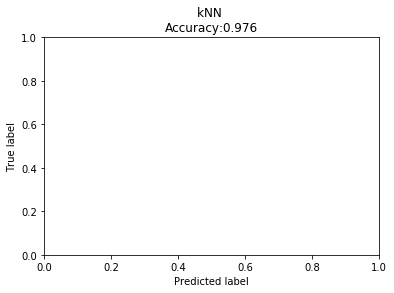

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.88      1.00      0.93        14
         170       1.00      0.88      0.94        17
         190       1.00      1.00      1.00        45
          20       1.00      0.71      0.83        14
         200       0.97      0.99      0.98        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.80      1.00      0.89        16
         300       0.94      1.00      0.97        49
         310       1.00    

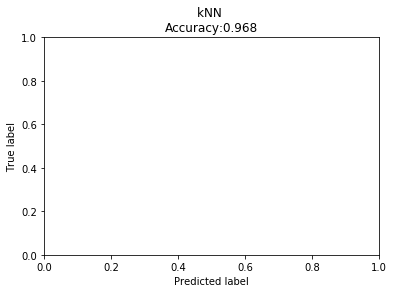

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.78      1.00      0.88        14
         170       1.00      0.76      0.87        17
         190       0.98      0.98      0.98        45
          20       1.00      0.79      0.88        14
         200       0.99      0.99      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.84      1.00      0.91        16
         300       0.91      0.98      0.94        49
         310       0.98    

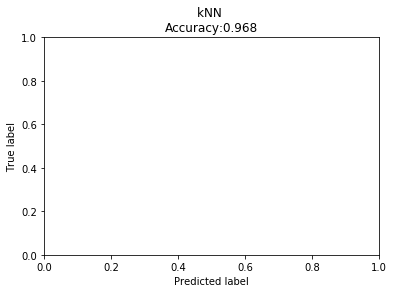

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.00      0.00      0.00         2
         130       0.93      0.96      0.95        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.78      1.00      0.88        14
         170       1.00      0.76      0.87        17
         190       1.00      1.00      1.00        45
          20       1.00      0.71      0.83        14
         200       0.99      0.99      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.80      1.00      0.89        16
         300       0.92      0.98      0.95        49
         310       0.98    

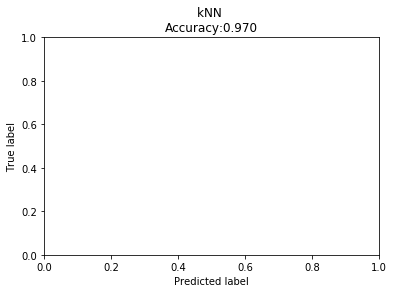

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.76      0.93      0.84        14
         170       0.93      0.76      0.84        17
         190       1.00      1.00      1.00        45
          20       1.00      0.71      0.83        14
         200       0.97      1.00      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.80      1.00      0.89        16
         300       0.94      0.98      0.96        49
         310       0.98    

In [68]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    phase_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(phase_predictor)

    cm = confusion_matrix(y_test, phase_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, phase_predictor))

In [69]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [70]:
# save the model to disk
filename = '../models/KNC_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

['280' '240' '310' '200' '280' '130' '280' '190' '280' '240' '310' '240'
 '300' '330' '280' '200' '190' '280' '190' '220' '60' '300' '200' '30'
 '260' '70' '70' '170' '330' '220' '240' '40' '240' '200' '190' '130'
 '310' '310' '220' '310' '20' '150' '300' '310' '280' '260' '60' '170'
 '20' '300' '100' '200' '200' '260' '260' '280' '130' '320' '190' '240'
 '300' '140' '70' '240' '200' '330' '90' '310' '260' '200' '240' '300'
 '300' '280' '260' '90' '330' '140' '240' '310' '220' '280' '240' '330'
 '220' '260' '150' '190' '140' '200' '320' '240' '310' '280' '70' '260'
 '70' '280' '240' '310' '220' '160' '40' '20' '280' '200' '70' '280' '260'
 '60' '240' '310' '310' '280' '330' '280' '240' '30' '320' '300' '190'
 '200' '310' '170' '260' '300' '310' '320' '200' '90' '200' '190' '220'
 '200' '280' '70' '40' '130' '310' '320' '220' '150' '220' '130' '60'
 '200' '30' '200' '220' '320' '200' '300' '310' '80' '240' '200' '220'
 '280' '300' '190' '300' '280' '320' '260' '300' '320' '240' '40' '28

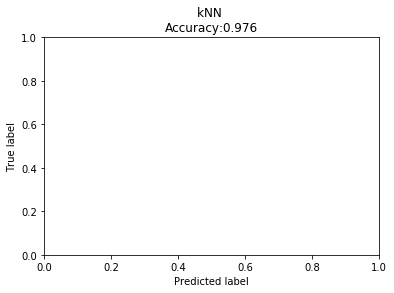

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.88      1.00      0.93        14
         170       1.00      0.88      0.94        17
         190       0.98      0.98      0.98        45
          20       1.00      0.86      0.92        14
         200       0.99      0.99      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.89      1.00      0.94        16
         300       0.94      0.96      0.95        49
         310       0.98    

In [71]:
best_KNC_2 = loaded_model.fit(X_train, y_train)
phase_predictor_2 = best_KNC_2.predict(X_test)
print(phase_predictor_2)

cm = confusion_matrix(y_test, phase_predictor_2)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor_2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, phase_predictor_2))

In [72]:
print(classification_report(y_test, phase_predictor))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        22
         100       1.00      1.00      1.00         8
         120       0.50      0.50      0.50         2
         130       0.96      0.96      0.96        27
         140       1.00      1.00      1.00         9
         150       1.00      1.00      1.00        28
         160       0.76      0.93      0.84        14
         170       0.93      0.76      0.84        17
         190       1.00      1.00      1.00        45
          20       1.00      0.71      0.83        14
         200       0.97      1.00      0.99        76
         220       1.00      1.00      1.00        49
         240       1.00      1.00      1.00        64
         260       1.00      1.00      1.00        54
         280       1.00      1.00      1.00        77
          30       0.80      1.00      0.89        16
         300       0.94      0.98      0.96        49
         310       0.98    

In [73]:
y_test.head()

6181    280
4382    240
6410    310
3149    200
6019    280
Name: Phase, dtype: object

In [74]:
phase_predictor

array(['280', '240', '310', '200', '280', '130', '280', '190', '280',
       '240', '310', '240', '300', '330', '280', '200', '190', '280',
       '190', '220', '60', '300', '200', '30', '260', '70', '70', '170',
       '330', '220', '240', '40', '240', '200', '190', '130', '310',
       '310', '220', '310', '20', '150', '300', '310', '280', '260', '60',
       '170', '30', '300', '100', '200', '200', '260', '260', '280',
       '130', '320', '190', '240', '300', '140', '80', '240', '200',
       '330', '70', '310', '260', '200', '240', '300', '300', '280',
       '260', '90', '330', '140', '240', '310', '220', '280', '240',
       '330', '220', '260', '150', '190', '140', '200', '200', '240',
       '310', '280', '70', '260', '70', '280', '240', '310', '220', '160',
       '40', '20', '280', '200', '70', '280', '260', '60', '240', '310',
       '310', '280', '330', '280', '240', '30', '320', '300', '190',
       '200', '310', '170', '260', '300', '310', '320', '200', '90',
       '200

In [75]:
y_test['phase_prediction'] = phase_predictor

In [76]:
y_test.head()

6181    280
4382    240
6410    310
3149    200
6019    280
Name: Phase, dtype: object

In [77]:
X.shape

(8080, 15)

In [78]:
cycle_df.shape, train_df.shape

((8080, 18), (8080, 16))

In [79]:
result = X_test

In [80]:
result

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,0.000000,0.194444,5.23392,0.00128,5.23392,0.00128,5.23392,0.00128,5.23392,0.00128,-1.77778,1.97222,-1.77778,1.97222,10.0
2521,5.900928,1.475232,6.57550,0.04417,6.57550,0.04417,6.57550,0.04417,6.57550,0.04417,-1.47523,1.47523,-1.47523,1.47523,39.0
8016,29.750000,-0.638889,12.78078,0.01675,12.78078,0.01675,12.78078,0.01675,12.78078,0.01675,-1.50000,1.66667,-1.50000,1.66667,0.0
7460,20.805556,0.194444,8.26704,0.01777,8.26704,0.01777,8.26704,0.01777,8.26704,0.01777,-1.50000,1.66667,-1.50000,1.66667,0.0


In [81]:
result.shape

(808, 15)

In [82]:
result['actual_phase'] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
result['predictive_phase'] = phase_predictor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
result.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0,280,280
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0,240,240
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0,310,310
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0,200,200
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0,280,280


In [85]:
result.shape[0], result[result.actual_phase != result.predictive_phase].shape[0]

(808, 24)

In [86]:
100 - (100 * result[result.actual_phase != result.predictive_phase].shape[0] / result.shape[0])

97.02970297029702

In [87]:
result = convert_phase(result, "actual_phase", invertion_phase_mapping)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
result = convert_phase(result, "predictive_phase", invertion_phase_mapping)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
result.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0,rts95_Phase 1,rts95_Phase 1
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0,hwfet_Phase 1,hwfet_Phase 1
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0,wltp_class3b_Low 3,wltp_class3b_Low 3
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0,ftp72_Phase 2,ftp72_Phase 2
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0,rts95_Phase 1,rts95_Phase 1


In [90]:
result[result.actual_phase != result.predictive_phase].head(12).append(result[result.actual_phase != result.predictive_phase].tail(12))


,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
373,26.972222,0.861111,27.00233,0.04570,27.00233,0.04570,27.00233,0.04570,27.00233,0.04570,-3.36111,1.86111,-3.36111,1.86111,0.0,artemis_motor130_Motorway 2,artemis_motor130_Motorway 3
1222,17.666667,0.750000,13.66470,0.02609,13.66470,0.02609,13.66470,0.02609,13.66470,0.02609,-4.08333,2.36111,-4.08333,2.36111,0.0,artemis_road_Road 4,artemis_road_Road 2
1032,14.083333,0.138889,14.23557,0.02756,14.23557,0.02756,14.23557,0.02756,14.23557,0.02756,-4.08333,2.36111,-4.08333,2.36111,0.0,artemis_road_Road 3,artemis_road_Road 2
385,27.305556,0.000000,27.03552,0.04397,27.03552,0.04397,27.03552,0.04397,27.03552,0.04397,-3.36111,1.86111,-3.36111,1.86111,0.0,artemis_motor130_Motorway 2,artemis_motor130_Motorway 3
2304,4.527778,0.611111,4.73030,0.00581,4.73030,0.00581,4.73030,0.00581,4.73030,0.00581,-3.13889,2.86111,-3.13889,2.86111,19.0,artemis_urban_Urban 5,artemis_urban_Urban 4
2231,8.083333,-0.416667,5.00343,0.00945,5.00343,0.00945,5.00343,0.00945,5.00343,0.00945,-3.13889,2.86111,-3.13889,2.86111,4.0,artemis_urban_Urban 4,artemis_urban_Urban 5
1021,11.750000,1.166667,14.23762,0.02558,14.23762,0.02558,14.23762,0.02558,14.23762,0.02558,-4.08333,2.36111,-4.08333,2.36111,0.0,artemis_road_Road 2,artemis_road_Road 3
7730,0.333333,-0.333333,10.33894,0.00000,10.33894,0.00000,10.33894,0.00000,10.33894,0.00000,-1.50000,1.66667,-1.50000,1.66667,0.0,wltp_class3b_High 3-2,ftp72_Phase 2
379,29.500000,0.416667,27.01951,0.04864,27.01951,0.04864,27.01951,0.04864,27.01951,0.04864,-3.36111,1.86111,-3.36111,1.86111,0.0,artemis_motor130_Motorway 2,artemis_motor130_Motorway 3
2350,0.000000,1.000000,4.78832,0.00108,4.78832,0.00108,4.78832,0.00108,4.78832,0.00108,-3.13889,2.86111,-3.13889,2.86111,10.0,artemis_urban_Urban 5,artemis_urban_Urban 4


In [91]:
#Export dataframe as a csv
result.to_csv("../data/classification_result.csv", index=0)